<a href="https://colab.research.google.com/github/yesung05/2025-1-myclass-BDA/blob/main/inclass/05w_A_mon_0407_easy_ch05_dataframe_medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05주 수업

## 05-3 파생변수 생성 p116

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'var1':[4,3,8], 'var2': [2,6,1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [4]:
df1 = df.copy()
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [5]:
df1['var_sum'] = df1.var1 + df1.var2
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [6]:
df1.var_sum = df1.var1 + df1.var2
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [7]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [8]:
df2.sum()

,0
var1,15
var2,9


In [9]:
df2.sum(axis = 0)

,0
var1,15
var2,9


In [10]:
df2.sum(axis = 1)

,0
0,6
1,9
2,9


In [12]:
df2['my_sum'] = df2.sum(axis=1)
df2

,var1,var2,my_sum
0,4,2,12
1,3,6,18
2,8,1,18


In [13]:
df2['my_sum'] = df2.sum(axis='columns')
df2

,var1,var2,my_sum
0,4,2,18
1,3,6,27
2,8,1,27


In [14]:
df2.sum(axis='index')

,0
var1,15
var2,9
my_sum,72


In [15]:
df2[['var1', 'var2']]
df2

,var1,var2,my_sum
0,4,2,18
1,3,6,27
2,8,1,27


In [16]:
df2['var1']

,var1
0,4
1,3
2,8


In [17]:
df2[['var1']]

,var1
0,4
1,3
2,8


In [19]:
df2['my_mean'] = df2[['var1','var2']].mean(axis='columns')
df2

,var1,var2,my_sum,my_mean
0,4,2,18,3.0
1,3,6,27,4.5
2,8,1,27,4.5


## mpg 데이터

In [20]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.29 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [23]:


mpg = pd.read_csv('data/mpg.csv')
mpg.info

<bound method DataFrame.info of     manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

    category  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]>

In [24]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
163,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv
88,ford,f150 pickup 4wd,5.4,1999,8,auto(l4),4,11,15,r,pickup


In [26]:
mpg['total'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [27]:
mpg['mpg_mean'] = mpg[['cty', 'hwy']].mean(axis=1)
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
191,toyota,camry solara,3.0,1999,6,manual(m5),f,18,26,r,compact,22.0,22.0
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,manual(m5),4,11,16,r,pickup,13.5,13.5
183,toyota,camry,3.0,1999,6,auto(l4),f,18,26,r,midsize,22.0,22.0


In [28]:
sum(mpg['total']) / len(mpg)


20.14957264957265

In [29]:
mpg.shape

(234, 13)

In [30]:
mpg.shape[1]

13

In [31]:
sum(mpg['total']) / mpg.shape[0]


20.14957264957265

In [32]:
mpg.total.describe()

,total
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


In [33]:
mpg.total.describe()['mean']

np.float64(20.14957264957265)

In [34]:
mpg.total.describe()[1]

<ipython-input-34-b4aef9eccf3a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mpg.total.describe()[1]


np.float64(20.14957264957265)

In [35]:
mpg.total.describe().iloc[1]

np.float64(20.14957264957265)

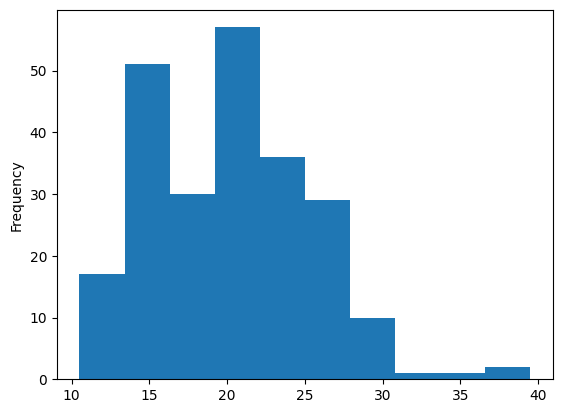

In [38]:
mpg.total.plot.hist();

In [45]:
!pip install koreanize_matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

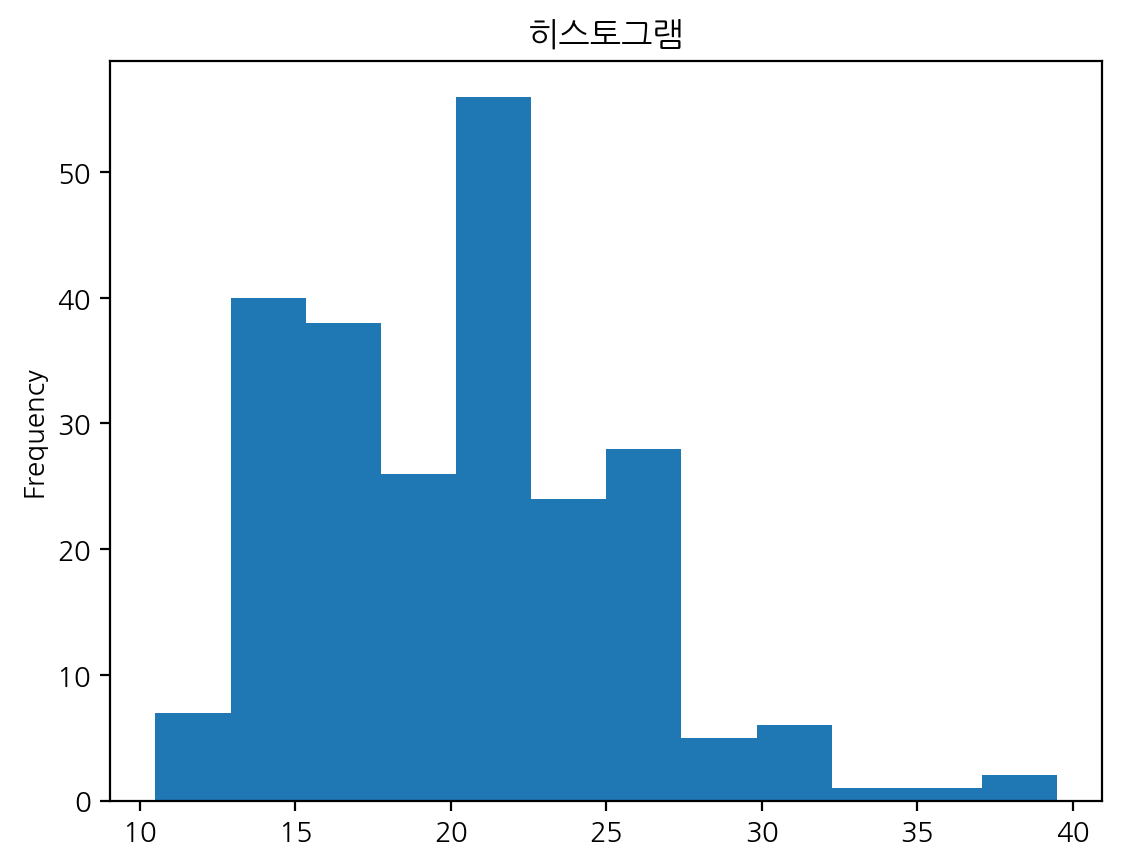

In [48]:

mpg.total.plot(kind='hist', title='히스토그램', bins=12);

<Axes: xlabel='total', ylabel='Count'>

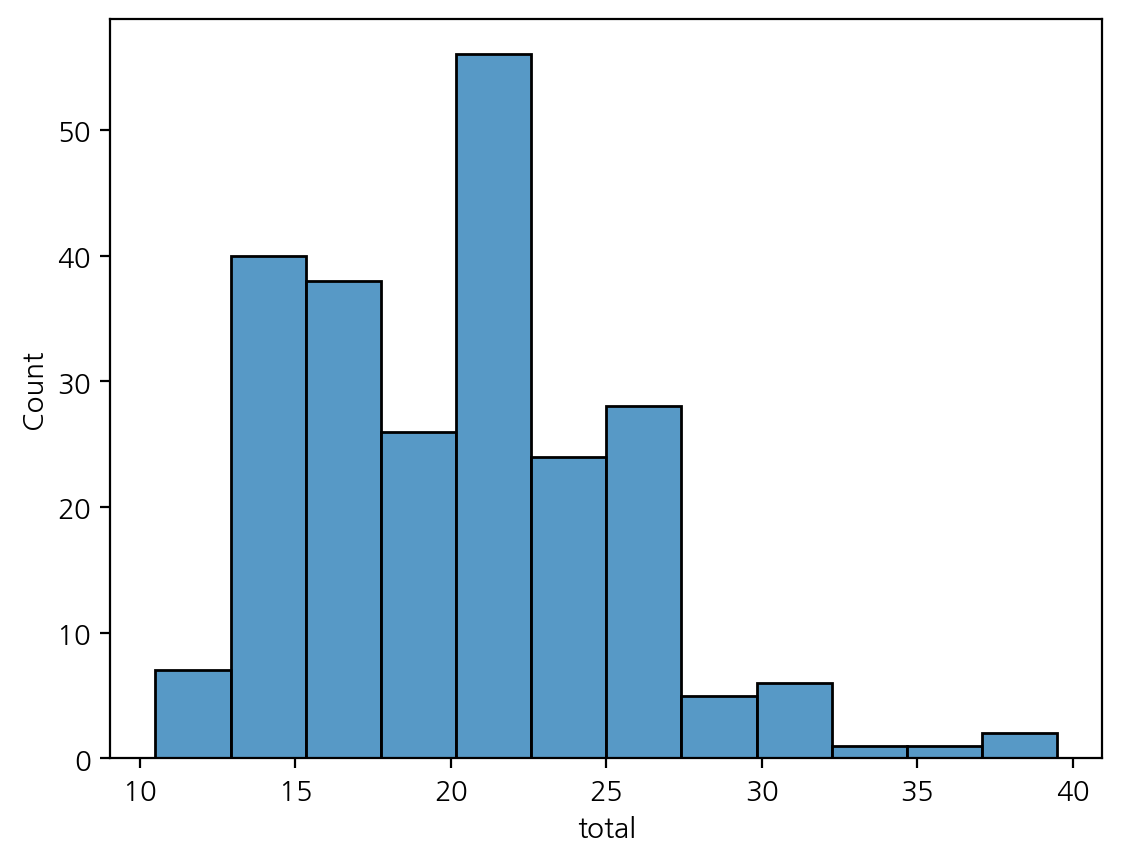

In [47]:
import seaborn as sns
sns.histplot(mpg, x = 'total')

## np.where()

In [50]:
np.where(mpg.total >= 20, 'pass', 'fail')

array(['pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'fail',
       'pass', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'pass',
       'fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'fail',
       'fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'fail',
       'fail', 'fail', 'fail', 'pass', 'pass', 'pass', 'pass', 'pass',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass',
      

In [52]:
mpg['test'] = np.where(mpg.total >= 20, 'pass', 'fail')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv,15.0,15.0,fail
41,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan,20.5,20.5,pass
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0,25.0,pass
170,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,27,r,compact,23.5,23.5,pass
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5,22.5,pass


In [53]:
mpg['test'].value_counts()

,count
test,
pass,128
fail,106


In [54]:
mpg['test'].unique()

array(['pass', 'fail'], dtype=object)

In [55]:
count_test = mpg['test'].value_counts()

In [57]:
count_test

,count
test,
pass,128
fail,106


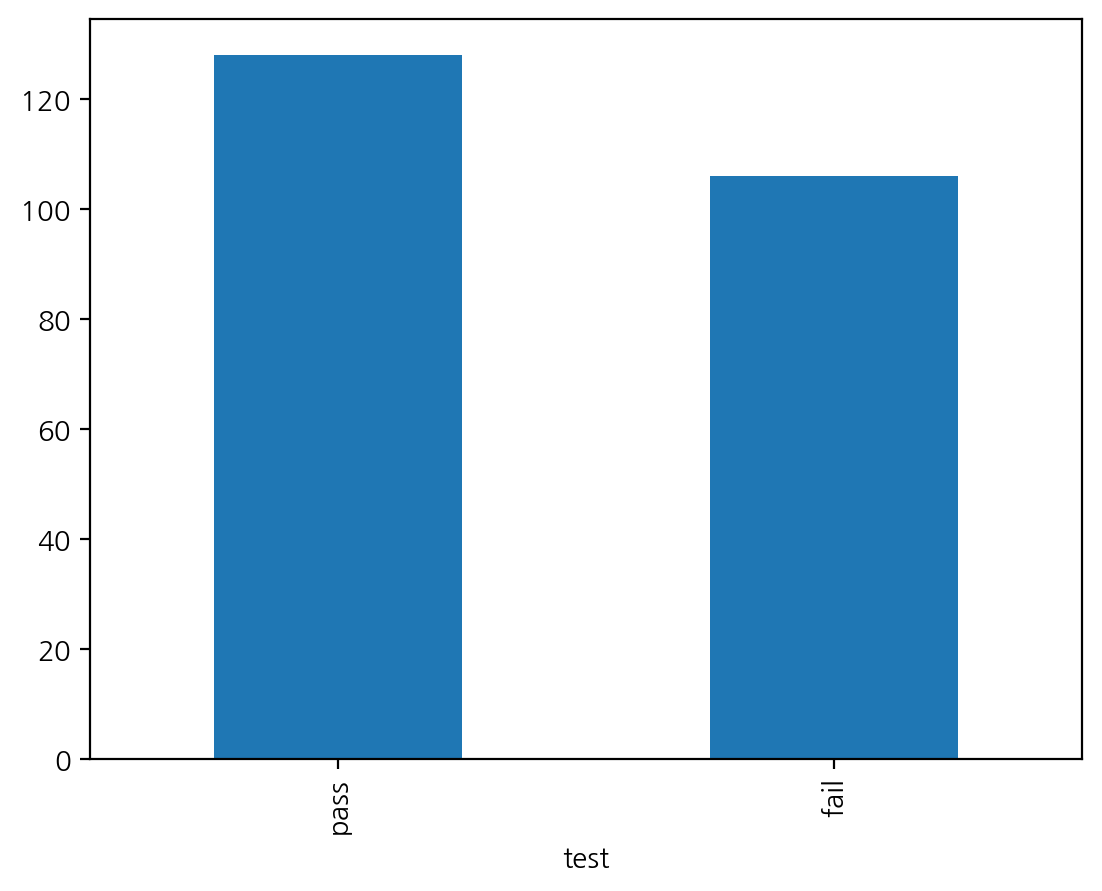

In [59]:
count_test.plot.bar();

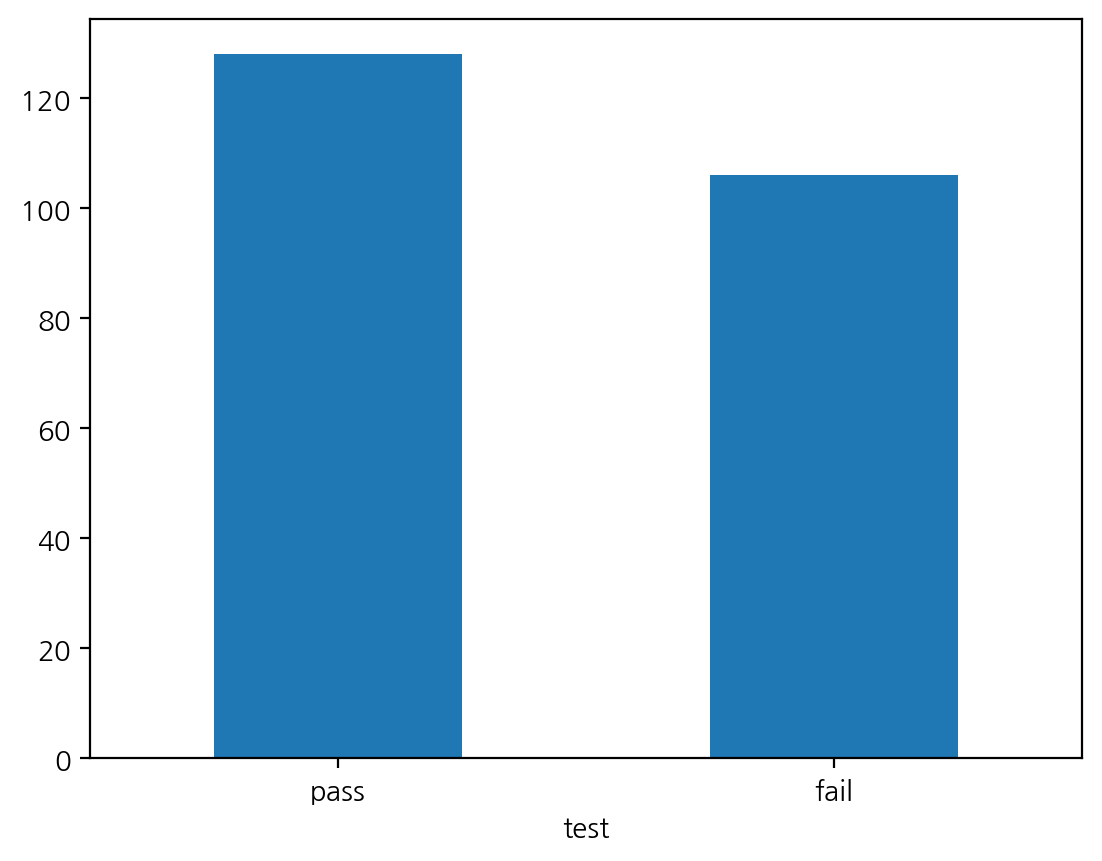

In [61]:
count_test.plot.bar(rot=0);

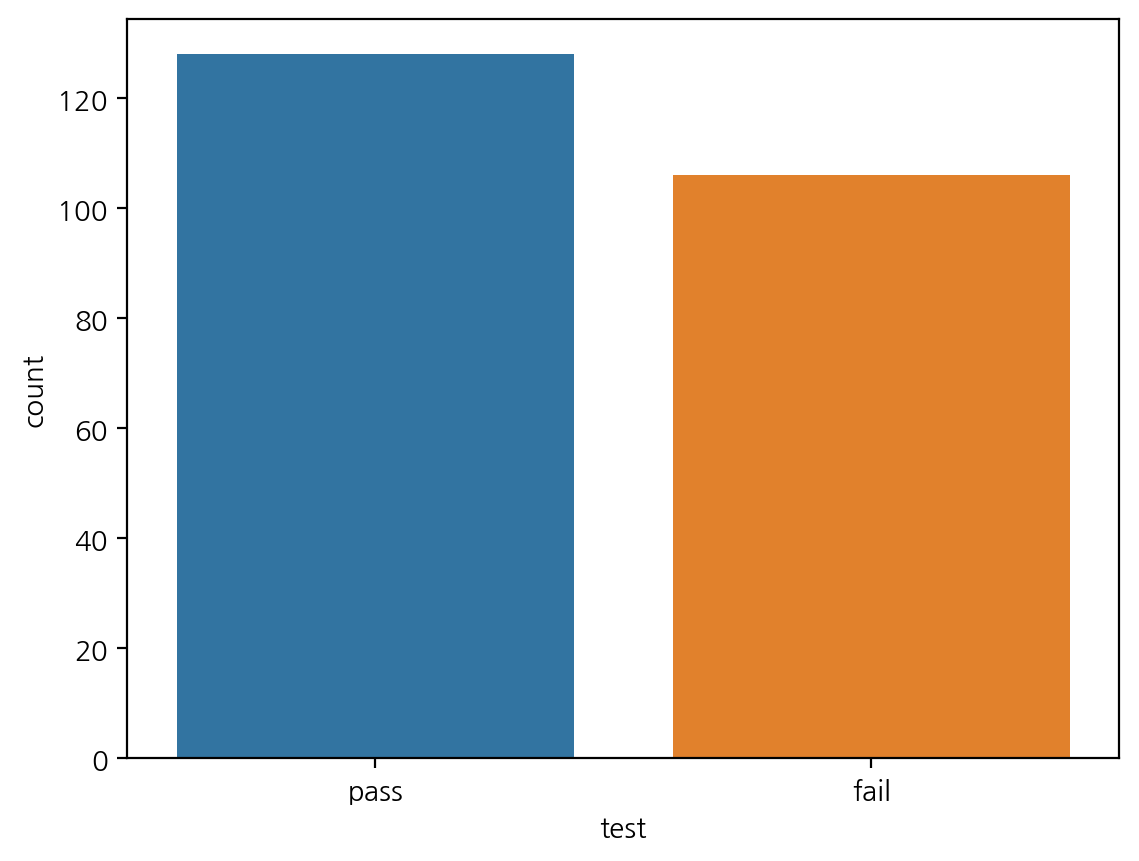

In [62]:
sns.countplot(mpg, x='test', hue='test');

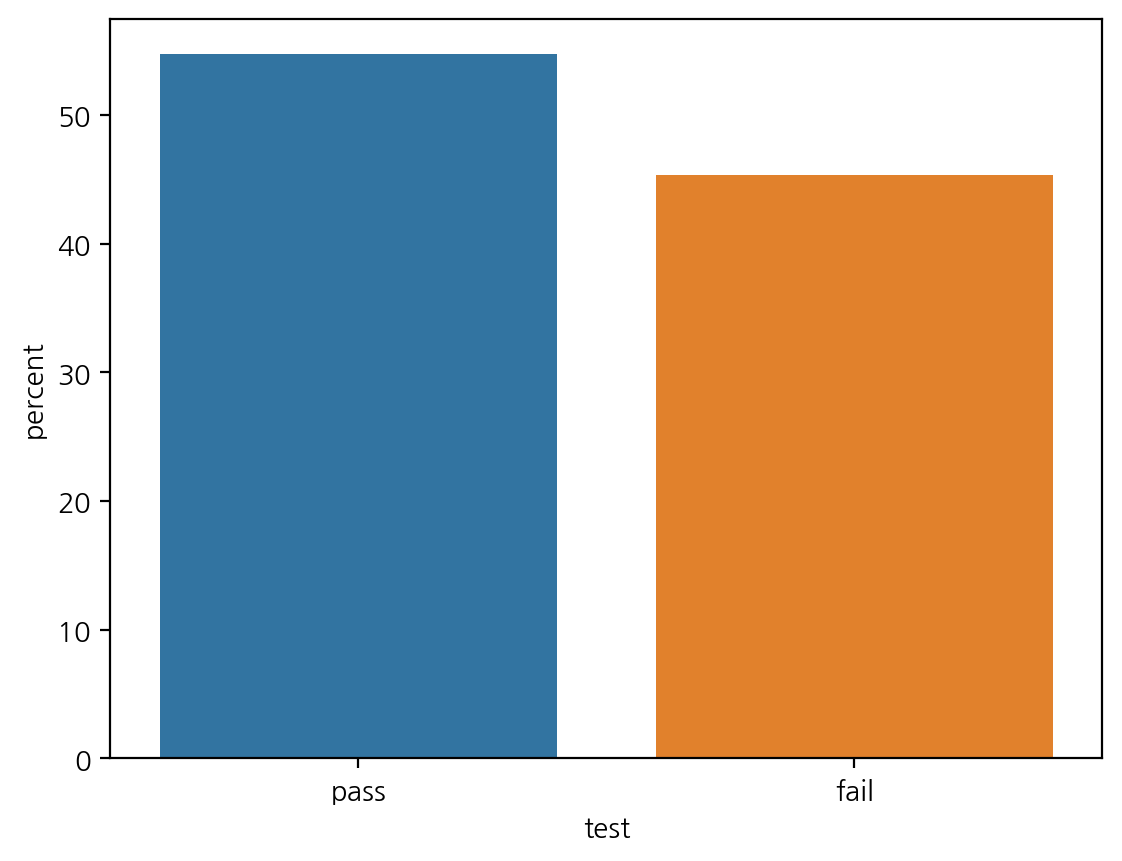

In [63]:
sns.countplot(mpg, x='test', hue='test', stat='percent');

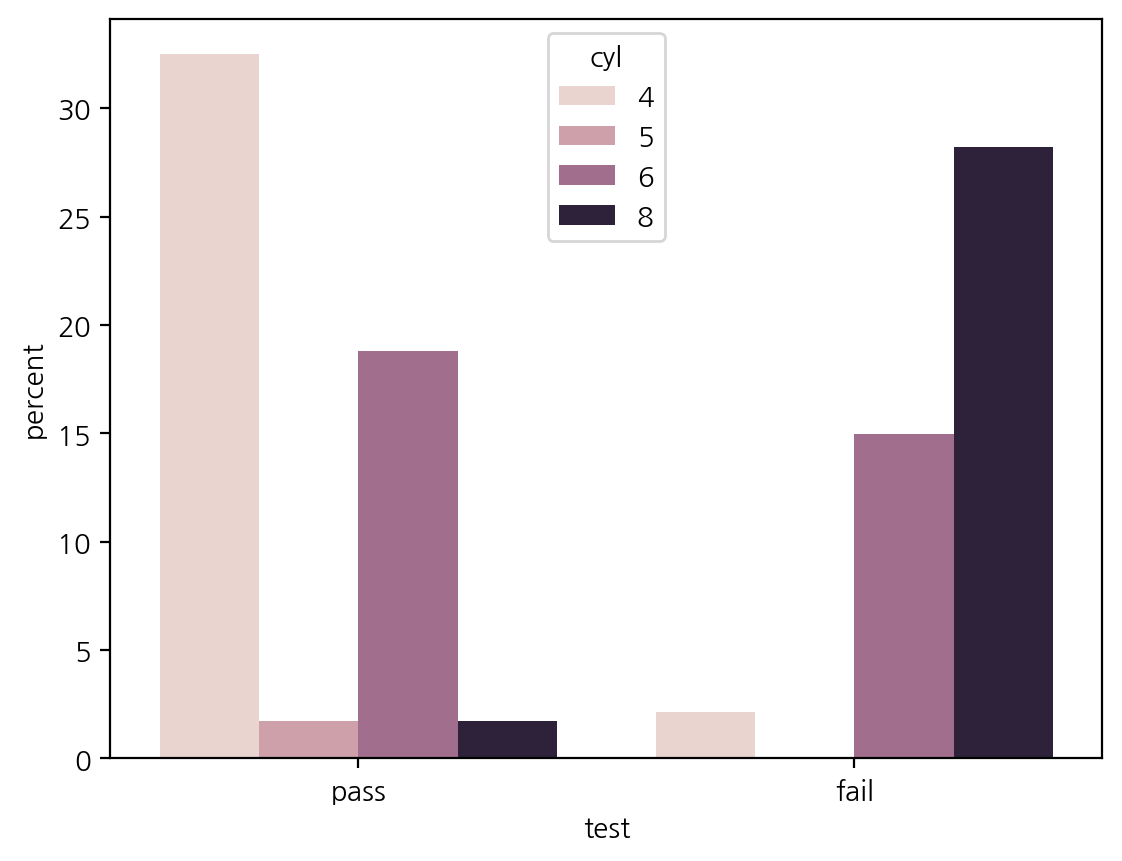

In [64]:
sns.countplot(mpg, x='test', hue='cyl', stat='percent');

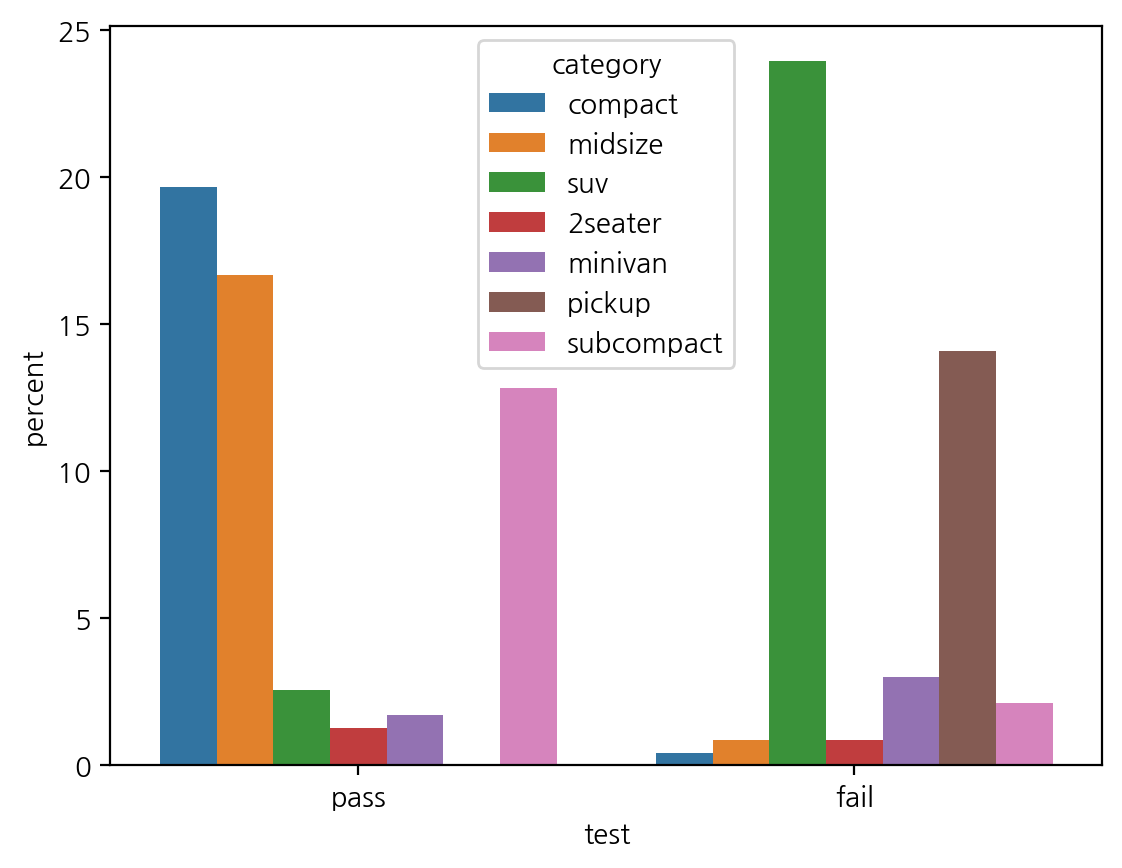

In [70]:
sns.countplot(mpg, x='test', hue='category', stat='percent');

In [75]:
mpg['grade'] = np.where(mpg.total > 30, 'A', np.where(mpg.total > 20, 'B' , 'C'))

In [76]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,35.0,pass,A
87,ford,f150 pickup 4wd,4.6,2008,8,auto(l4),4,13,17,r,pickup,15.0,15.0,fail,C
160,subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv,21.0,21.0,pass,B
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv,12.5,12.5,fail,C
31,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,15.5,fail,C


In [77]:
count_grade = mpg['grade'].value_counts()
count_grade

,count
grade,
B,115
C,111
A,8


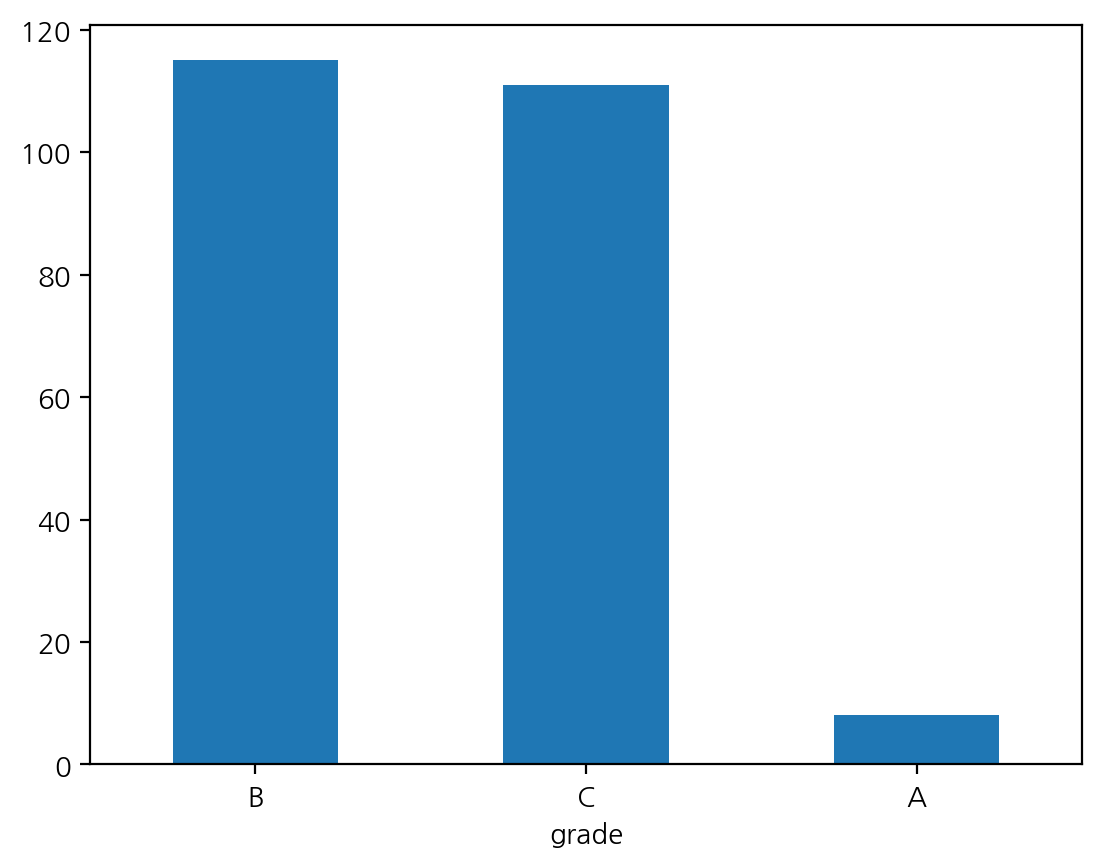

In [79]:
count_grade.plot.bar(rot = 0);

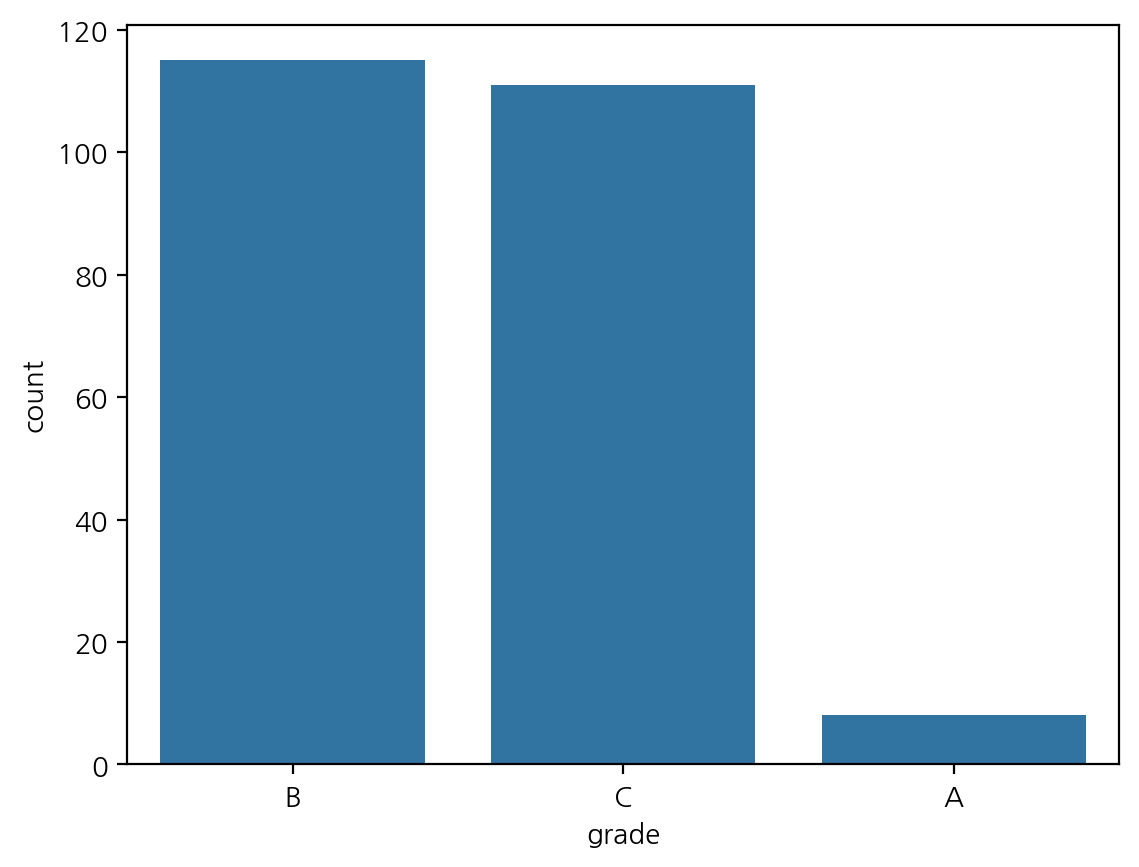

In [80]:
sns.countplot(mpg, x='grade');

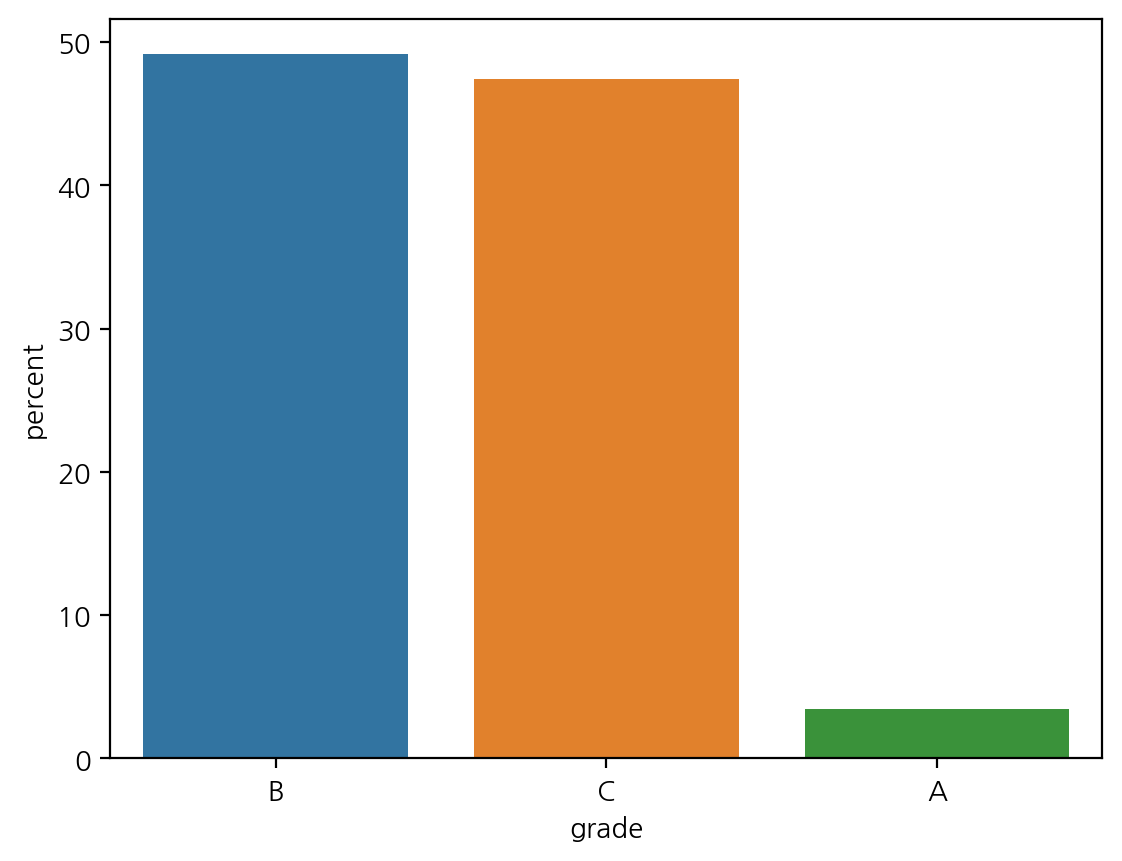

In [81]:
sns.countplot(mpg, x='grade', hue = 'grade', stat='percent');

In [85]:
mpg.grade.value_counts().sort_index().index

Index(['A', 'B', 'C'], dtype='object', name='grade')

In [87]:
mpg.grade.value_counts().sort_index().index

Index(['A', 'B', 'C'], dtype='object', name='grade')

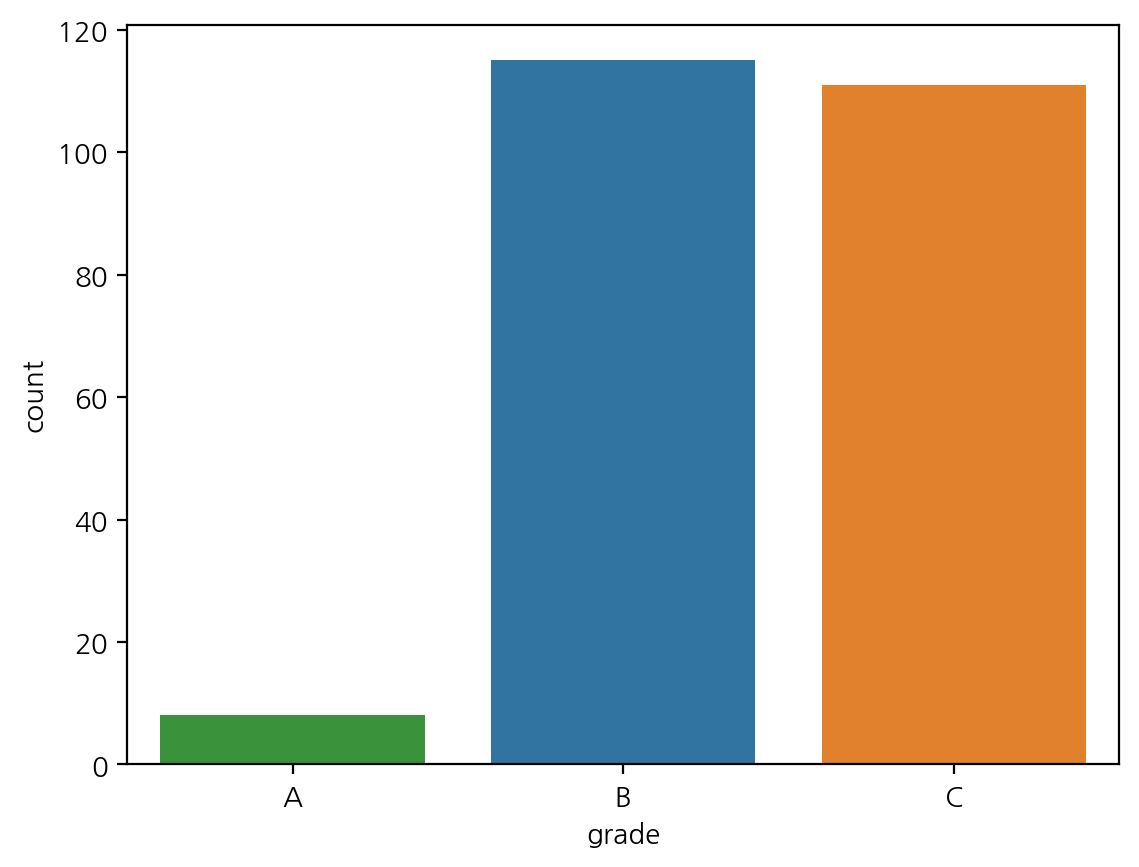

In [88]:
sns.countplot(mpg, x='grade', hue='grade', order=mpg.grade.value_counts().sort_index().index);